# Summary Statistics and Comparisons by Snow Year

Table of Stats per year (all data)
- number of pits
- number of layers
- Unique countries
- Unique users
- Professional pits
- non-professional pits
- ECT Results qty
- CT Results qty
- PST Results qty

Charts of overall data
- pits by country
- qty of pits by year
- Global map?
- Heatmap of pit location in US

US Pits by Season
- 

Montana Pits by Season
- Year over year pit qty by date

For each season
- P

#### Import Libraries

In [27]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from snowpylot.caaml_parser import caaml_parser

#### Define Folders

#### Parse files and build dataframe

In [28]:
def createSummaryDF(folder_path):

    files_list = [f for f in os.listdir(folder_path) if f.endswith(".xml")]  # List of all CAAML files in the folder
    
    pitList = []

    for file in files_list:  # iterate through each file in the folder
        file_path = folder_path + "/" + file  # create the file path
        pit = caaml_parser(file_path)  # parse the file

        numPrimaryGrainForm = 0  # initialize
        numPrimaryGrainSize = 0  # initialize
        for layer in pit.snowProfile.layers:  # iterate through each layer in the pit
            if (
                layer.grainFormPrimary is not None
            ):  # if the layer has a primary grain form
                numPrimaryGrainForm += 1  # increment the number of primary grain forms
                if (
                    layer.grainFormPrimary.grainSizeAvg is not None
                ):  # if the layer has a primary grain size
                    numPrimaryGrainSize += (
                        1  # increment the number of primary grain sizes
                    )

        pitDict = {  # create a dictionary of the pit information for each pit
            "PitID": pit.coreInfo.pitID,
            "Date": pit.coreInfo.date,
            "Country": pit.coreInfo.location.country,
            "Operation Name": pit.coreInfo.user.operationName,
            "SnowPilot Username": pit.coreInfo.user.username,
            "num Layers": len(pit.snowProfile.layers),
            "num Layers wPrimary Grain Form": numPrimaryGrainForm,
            "num Layers wPrimary Grain Size": numPrimaryGrainSize,
            "tempMeasurements": len(pit.snowProfile.tempProfile)
            if pit.snowProfile.tempProfile is not None
            else 0,
            "densityMeasurements": len(pit.snowProfile.densityProfile)
            if pit.snowProfile.densityProfile is not None
            else 0,
            "ECT_qty": len(pit.stabilityTests.ECT),
            "CT_qty": len(pit.stabilityTests.CT),
            "PST_qty": len(pit.stabilityTests.PST),
            "RBT_qty": len(pit.stabilityTests.RBlock),
        }
        pitList.append(pitDict)  # append the pit dictionary to the list

    df = pd.DataFrame(pitList)
    return df

In [29]:
# Define folders and parse CAAML files

# 2019-2020
df_19_20 = createSummaryDF("snowpits/by_season/2019-2020") # df of all pits from 2019-2020 season

# 2020-2021
df_20_21 = createSummaryDF("snowpits/by_season/2020-2021") # df of all pits from 2020-2021 season

# 2021-2022
df_21_22 = createSummaryDF("snowpits/by_season/2021-2022") # df of all pits from 2021-2022 season

# 2022-2023
df_22_23 = createSummaryDF("snowpits/by_season/2022-2023") # df of all pits from 2022-2023 season

In [30]:
# Create dataframe of pits from all seasons
df_all= pd.concat([df_19_20, df_20_21, df_21_22, df_22_23])

In [34]:
# Create a dataframe with date counts from the existing df
date_counts = df_all.groupby('Date').size().reset_index(name='count')

# Sort by date
date_counts['Date'] = pd.to_datetime(date_counts['Date'])
date_counts = date_counts.sort_values('Date')

# Display the dataframe
print(date_counts)
date_counts.to_csv('pits_by_date.csv',index = False)

           Date  count
0    1998-12-17      2
1    1998-12-28      2
2    2017-04-18      1
3    2017-12-05      1
4    2018-01-26      1
...         ...    ...
1200 2023-09-23      3
1201 2023-09-24      1
1202 2023-09-25      1
1203 2023-09-26      1
1204 2023-09-27      1

[1205 rows x 2 columns]


PermissionError: [Errno 13] Permission denied: 'pits_by_date.csv'

In [35]:
# Create a dictionary to summarize available info

summary_info = {
    "Pits": int(df_all["PitID"].count()),  # number of pits
    "Layers": int(df_all["num Layers"].sum()),  # number of layers
    "Layers wPrimary Grain Form": int(
        df_all["num Layers wPrimary Grain Form"].sum()
    ),  # number of layers with primary grain form
    "Layers wPrimary Grain Size": int(
        df_all["num Layers wPrimary Grain Size"].sum()
    ),  # number of layers with primary grain size
    "Pits with Density Info": int(
        (df_all["densityMeasurements"] != 0).sum()
    ),  # number of pits with density info
    "Density Measurements": int(
        df_all["densityMeasurements"].sum()
    ),  # number of density measurements
    "Pits with Temp Info": int(
        (df_all["tempMeasurements"] != 0).sum()
    ),  # number of pits with temp info
    "Temp Measurements": int(
        df_all["tempMeasurements"].sum()
    ),  # number of temp measurements
    "ECT Results": int(df_all["ECT_qty"].sum()),  # number of ECT results
    "CT Results": int(df_all["CT_qty"].sum()),  # number of CT results
    "PST Results": int(df_all["PST_qty"].sum()),  # number of PST results
    "RBT Results": int(df_all["RBT_qty"].sum()),  # number of RBT results
}

#### Display Summary Info

In [36]:
for key, value in summary_info.items():
    print(key + ": " + str(value))

Pits: 23615
Layers: 177879
Layers wPrimary Grain Form: 145511
Layers wPrimary Grain Size: 84655
Pits with Density Info: 736
Density Measurements: 6354
Pits with Temp Info: 11323
Temp Measurements: 106944
ECT Results: 21753
CT Results: 25357
PST Results: 2723
RBT Results: 107


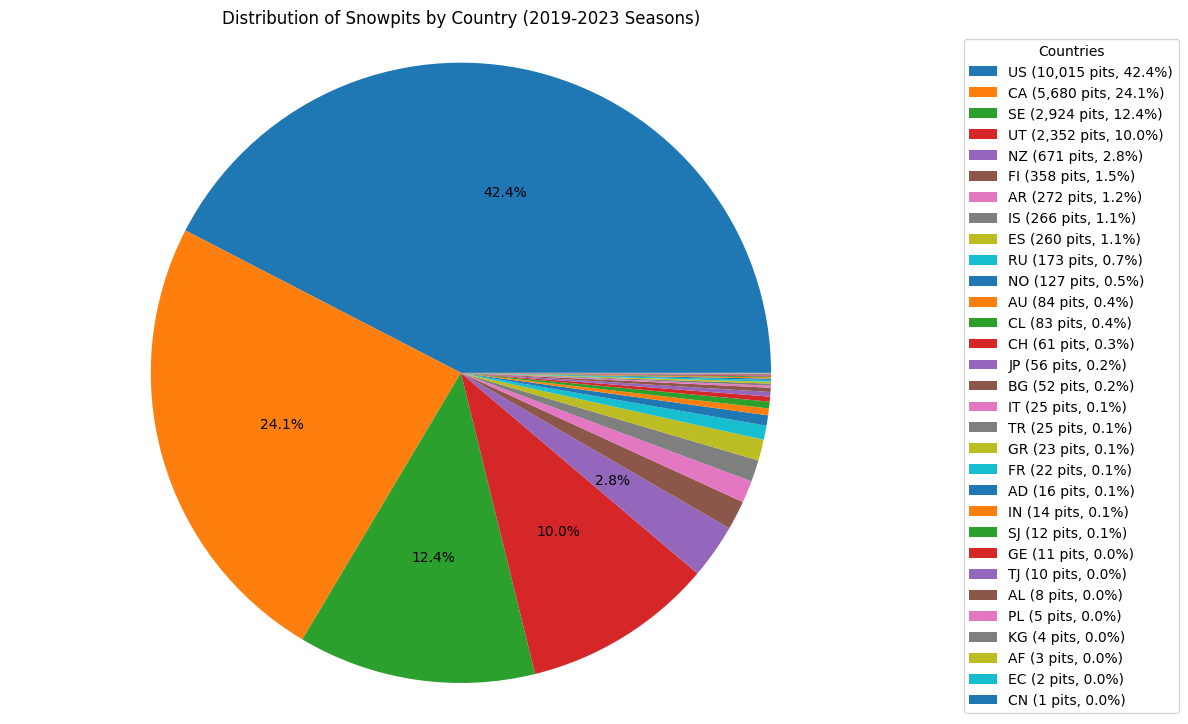

In [38]:
# Create pie chart of pits by country with detailed legend
plt.figure(figsize=(12, 8))
country_counts = df_all["Country"].value_counts()
total_pits = country_counts.sum()
percentages = (country_counts / total_pits * 100).round(1)

# Create legend labels with both count and percentage
legend_labels = [
    f"{country} ({count:,} pits, {pct}%)"
    for country, count, pct in zip(
        country_counts.index, country_counts.values, percentages
    )
]


# Custom function to only show labels for slices >= 2%
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(pct * total / 100.0)
        return f"{pct:.1f}%" if pct >= 2 else ""

    return my_autopct


plt.pie(country_counts.values, labels=None, autopct=make_autopct(country_counts.values))
plt.title("Distribution of Snowpits by Country (2019-2023 Seasons)")
plt.legend(legend_labels, title="Countries", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()  # Adjust layout to prevent legend cutoff
plt.show()